In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [80]:
data_src = "solar_data_combined_cleaned.csv"
data_df = pd.read_csv(data_src)

In [81]:
num_lags = 30
for i in range(1, num_lags + 1):
    data_df[f'GHI_T_{i}'] = data_df['GHI'].shift(i)

In [82]:
data_df

,datetime,local_datetime,Year,Month,Day,Hour,Minute,Temperature,Alpha,AOD,...,GHI_T_21,GHI_T_22,GHI_T_23,GHI_T_24,GHI_T_25,GHI_T_26,GHI_T_27,GHI_T_28,GHI_T_29,GHI_T_30
0,2018-01-01 16:30:00,2018-01-01 09:30:00,2018,1,1,16,30,-1.2,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 16:40:00,2018-01-01 09:40:00,2018,1,1,16,40,-0.8,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 16:50:00,2018-01-01 09:50:00,2018,1,1,16,50,-0.3,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 17:00:00,2018-01-01 10:00:00,2018,1,1,17,0,0.1,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 17:10:00,2018-01-01 10:10:00,2018,1,1,17,10,0.5,1.20,0.021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,2023-12-31 22:00:00,2023-12-31 15:00:00,2023,12,31,22,0,3.1,1.15,0.029,...,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0,263.0,244.0
135552,2023-12-31 22:10:00,2023-12-31 15:10:00,2023,12,31,22,10,2.8,1.15,0.029,...,379.0,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0,263.0
135553,2023-12-31 22:20:00,2023-12-31 15:20:00,2023,12,31,22,20,2.5,1.15,0.029,...,339.0,379.0,347.0,325.0,292.0,268.0,322.0,306.0,296.0,280.0
135554,2023-12-31 22:30:00,2023-12-31 15:30:00,2023,12,31,22,30,2.2,1.15,0.029,...,377.0,339.0,379.0,347.0,325.0,292.0,268.0,322.0,306.0,296.0


In [83]:
from copy import deepcopy as dc

data = dc(data_df)
data['local_datetime'] = pd.to_datetime(data_df['local_datetime'])
data.set_index('local_datetime', inplace = True)
data.drop('datetime', axis = 1, inplace = True)
data['Target'] = data['GHI'].shift(-12)
data.dropna(inplace = True)

In [84]:
data

,Year,Month,Day,Hour,Minute,Temperature,Alpha,AOD,Asymmetry,Clearsky DHI,...,GHI_T_22,GHI_T_23,GHI_T_24,GHI_T_25,GHI_T_26,GHI_T_27,GHI_T_28,GHI_T_29,GHI_T_30,Target
local_datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-01 14:30:00,2018,1,1,21,30,2.4,1.18,0.021,0.62,46,...,283.0,273.0,251.0,253.0,241.0,226.0,204.0,189.0,142.0,280.0
2018-01-01 14:40:00,2018,1,1,21,40,2.0,1.17,0.022,0.62,45,...,323.0,283.0,273.0,251.0,253.0,241.0,226.0,204.0,189.0,306.0
2018-01-01 14:50:00,2018,1,1,21,50,1.6,1.17,0.022,0.62,44,...,326.0,323.0,283.0,273.0,251.0,253.0,241.0,226.0,204.0,330.0
2018-01-02 07:40:00,2018,1,2,14,40,-7.3,1.17,0.016,0.62,15,...,333.0,326.0,323.0,283.0,273.0,251.0,253.0,241.0,226.0,353.0
2018-01-02 07:50:00,2018,1,2,14,50,-6.7,1.17,0.016,0.62,20,...,378.0,333.0,326.0,323.0,283.0,273.0,251.0,253.0,241.0,376.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 13:00:00,2023,12,31,20,0,5.5,1.19,0.028,0.62,56,...,198.0,176.0,158.0,138.0,115.0,96.0,44.0,68.0,93.0,203.0
2023-12-31 13:10:00,2023,12,31,20,10,5.4,1.19,0.028,0.62,55,...,221.0,198.0,176.0,158.0,138.0,115.0,96.0,44.0,68.0,183.0
2023-12-31 13:20:00,2023,12,31,20,20,5.3,1.19,0.028,0.62,55,...,236.0,221.0,198.0,176.0,158.0,138.0,115.0,96.0,44.0,153.0


In [85]:
corr_matrix = data.corr()
target_corr = corr_matrix['Target'].sort_values(ascending = False)
print(target_corr)

Target                1.000000
GHI                   0.479090
GHI_T_1               0.422044
DNI                   0.381131
GHI_T_2               0.364728
Kcs                   0.349369
Clearsky GHI          0.313283
GHI_T_3               0.306832
GHI_T_4               0.249480
Temperature           0.223753
Pressure              0.219743
GHI_T_5               0.192316
Clearsky DNI          0.186180
GHI_T_6               0.136062
Clearsky DHI          0.109606
Dew Point             0.095312
GHI_T_7               0.081379
Alpha                 0.058432
Wind Direction        0.050401
GHI_T_8               0.028364
Ozone                 0.009642
Precipitable Water    0.008266
Minute                0.000496
Day                  -0.001365
DHI                  -0.012259
AOD                  -0.019796
Year                 -0.021280
Wind Speed           -0.021682
GHI_T_9              -0.022083
Asymmetry            -0.024390
Month                -0.034687
GHI_T_10             -0.070609
Surface 

In [86]:
selected_features = target_corr[abs(target_corr) > 0.3].index.tolist()
print(selected_features)

['Target', 'GHI', 'GHI_T_1', 'DNI', 'GHI_T_2', 'Kcs', 'Clearsky GHI', 'GHI_T_3', 'GHI_T_27', 'Solar Zenith Angle', 'GHI_T_17', 'GHI_T_26', 'GHI_T_18', 'GHI_T_25', 'GHI_T_19', 'GHI_T_24', 'GHI_T_20', 'GHI_T_23', 'GHI_T_21', 'GHI_T_22']


In [87]:
data = data[selected_features]
print(data.columns)

Index(['Target', 'GHI', 'GHI_T_1', 'DNI', 'GHI_T_2', 'Kcs', 'Clearsky GHI',
       'GHI_T_3', 'GHI_T_27', 'Solar Zenith Angle', 'GHI_T_17', 'GHI_T_26',
       'GHI_T_18', 'GHI_T_25', 'GHI_T_19', 'GHI_T_24', 'GHI_T_20', 'GHI_T_23',
       'GHI_T_21', 'GHI_T_22'],
      dtype='object')


In [88]:
data

,Target,GHI,GHI_T_1,DNI,GHI_T_2,Kcs,Clearsky GHI,GHI_T_3,GHI_T_27,Solar Zenith Angle,GHI_T_17,GHI_T_26,GHI_T_18,GHI_T_25,GHI_T_19,GHI_T_24,GHI_T_20,GHI_T_23,GHI_T_21,GHI_T_22
local_datetime,,,,,,,,,,,,,,,,,,,,
2018-01-01 14:30:00,280.0,152,179.0,29,192.0,0.463,328,292.0,226.0,71.33,499.0,241.0,378.0,253.0,333.0,251.0,326.0,273.0,323.0,283.0
2018-01-01 14:40:00,306.0,160,152.0,43,179.0,0.525,305,192.0,241.0,72.47,502.0,253.0,499.0,251.0,378.0,273.0,333.0,283.0,326.0,323.0
2018-01-01 14:50:00,330.0,145,160.0,36,152.0,0.514,282,179.0,253.0,73.66,504.0,251.0,502.0,273.0,499.0,283.0,378.0,323.0,333.0,326.0
2018-01-02 07:40:00,353.0,34,145.0,438,160.0,1.000,34,152.0,251.0,87.51,504.0,273.0,504.0,283.0,502.0,323.0,499.0,326.0,378.0,333.0
2018-01-02 07:50:00,376.0,57,34.0,536,145.0,1.000,57,160.0,273.0,85.97,502.0,283.0,504.0,323.0,504.0,326.0,502.0,333.0,499.0,378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 13:00:00,203.0,395,401.0,563,404.0,0.849,465,386.0,96.0,64.18,263.0,115.0,244.0,138.0,246.0,158.0,236.0,176.0,221.0,198.0
2023-12-31 13:10:00,183.0,362,395.0,413,401.0,0.796,455,404.0,115.0,64.70,280.0,138.0,263.0,158.0,244.0,176.0,246.0,198.0,236.0,221.0
2023-12-31 13:20:00,153.0,346,362.0,378,395.0,0.781,443,401.0,138.0,65.30,296.0,158.0,280.0,176.0,263.0,198.0,244.0,221.0,246.0,236.0


In [89]:
Y = data['Target'].to_numpy()
X = data.drop(['Target'], axis = 1).to_numpy()

In [90]:
def data_split_scale(X, Y):
  train = int(0.8 * len(X))  # 80% Train
  test = len(X) - train #20% test

  X_train, Y_train = X[:train], Y[:train]
  X_test, Y_test = X[train:], Y[train:]

  X_scaler = MinMaxScaler(feature_range=(-1,1))
  Y_scaler = MinMaxScaler(feature_range=(-1,1))

  X_train_scaled = X_scaler.fit_transform(X_train)
  X_test_scaled = X_scaler.transform(X_test)

  Y_train_scaled = Y_scaler.fit_transform(Y_train.reshape(-1,1))
  Y_test_scaled = Y_scaler.transform(Y_test.reshape(-1,1))

  print("Shapes:", X_train_scaled.shape, Y_train_scaled.shape, X_test_scaled.shape, Y_test_scaled.shape)

  return X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler

X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler = data_split_scale(X, Y)

Shapes: (108411, 19) (108411, 1) (27103, 19) (27103, 1)


In [91]:
properties = None

In [92]:
from sklearn.linear_model import LinearRegression

benchmark_model = LinearRegression()

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "Linear Regression (Benchmark)",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

Regressor fitted in 0.1249 seconds
Score on Training data : 47.1340%
Score on Testing data : 46.8273%
RMSE : 195.6791
nRMSE: 0.4744
MAE: 158.4345


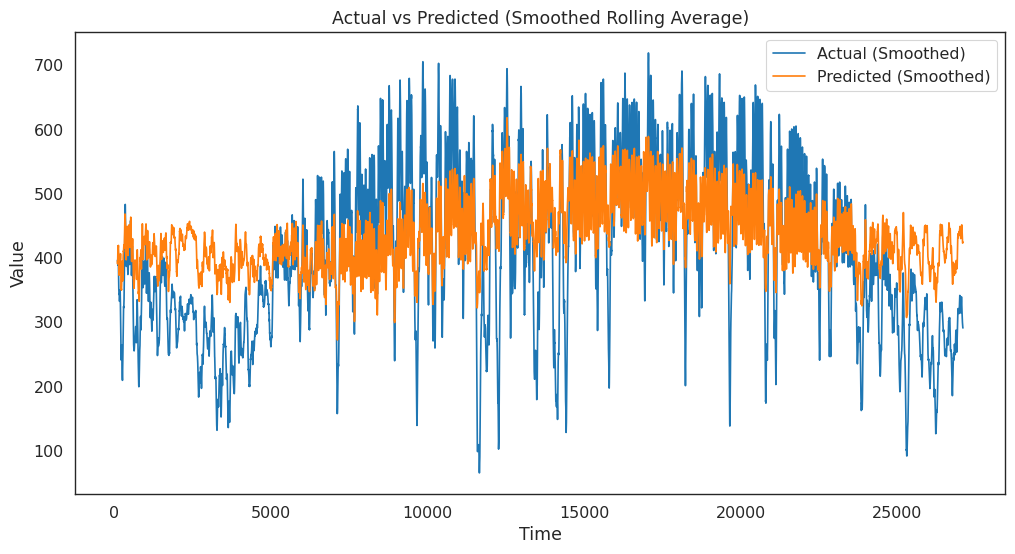

In [93]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [94]:
from sklearn.linear_model import Ridge

benchmark_model = Ridge(alpha = 0.8)

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "Ridge Regression",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

Regressor fitted in 0.0461 seconds
Score on Training data : 47.1340%
Score on Testing data : 46.8263%
RMSE : 195.6811
nRMSE: 0.4744
MAE: 158.4447


In [95]:
properties

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
Linear Regression (Benchmark),195.6791,0.4744,158.4345,47.134,46.8273,0.1249
Ridge Regression,195.6811,0.4744,158.4447,47.134,46.8263,0.0461


In [96]:
from sklearn.neighbors import KNeighborsRegressor

benchmark_model = KNeighborsRegressor(n_neighbors = 5, metric = "euclidean", weights = "uniform")
print(benchmark_model)

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "KNeighbours Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

KNeighborsRegressor(metric='euclidean')
Regressor fitted in 0.0134 seconds
Score on Training data : 78.2039%
Score on Testing data : 64.6483%
RMSE : 159.5531
nRMSE: 0.3868
MAE: 107.6854


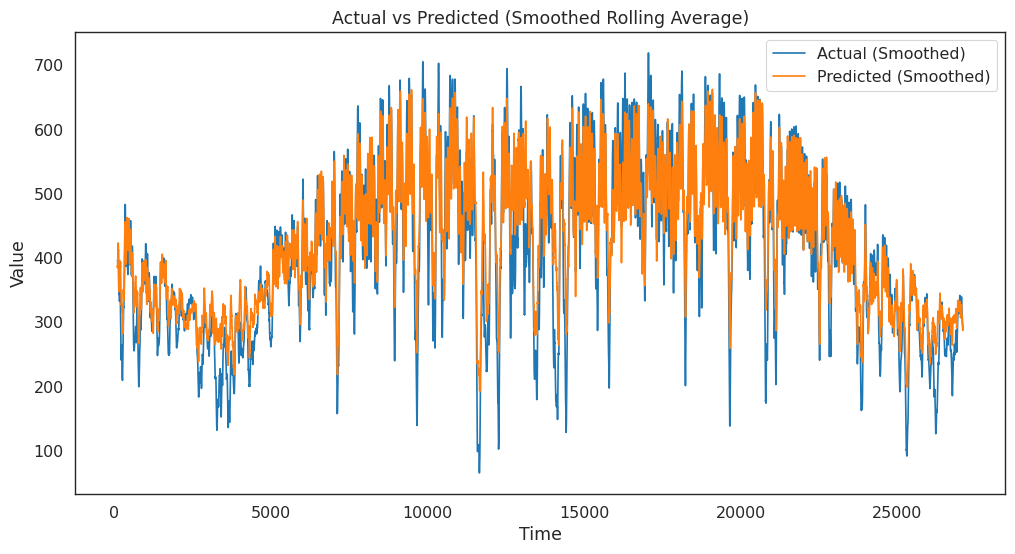

In [97]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [98]:
from sklearn.ensemble import RandomForestRegressor

benchmark_model = RandomForestRegressor(n_estimators = 125, max_depth = 100, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "RandomForest Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

RandomForestRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=125)
Regressor fitted in 290.96 seconds
Score on Training data : 90.67%
Score on Testing data : 71.74%
Regressor fitted in 290.9568 seconds
Score on Training data : 90.6675%
Score on Testing data : 71.7415%
RMSE : 142.6511
nRMSE: 0.3458
MAE: 97.8840


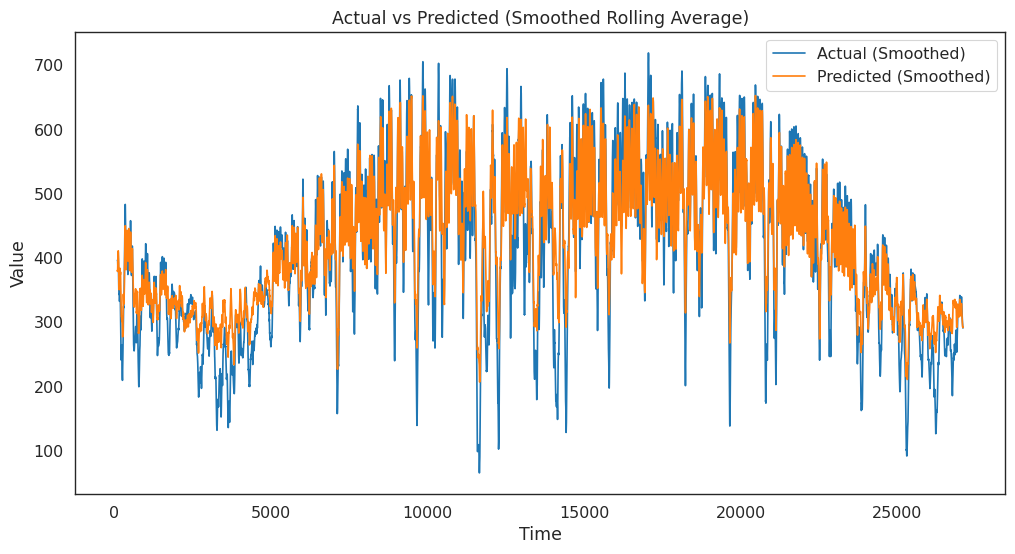

In [99]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

benchmark_model = GradientBoostingRegressor(n_estimators = 125, max_depth = 5, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "GradientBoosting Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=4,
                          n_estimators=125)
Regressor fitted in 116.49 seconds
Score on Training data : 71.21%
Score on Testing data : 70.07%
Regressor fitted in 116.4912 seconds
Score on Training data : 71.2077%
Score on Testing data : 70.0701%
RMSE : 146.8090
nRMSE: 0.3559
MAE: 104.3355


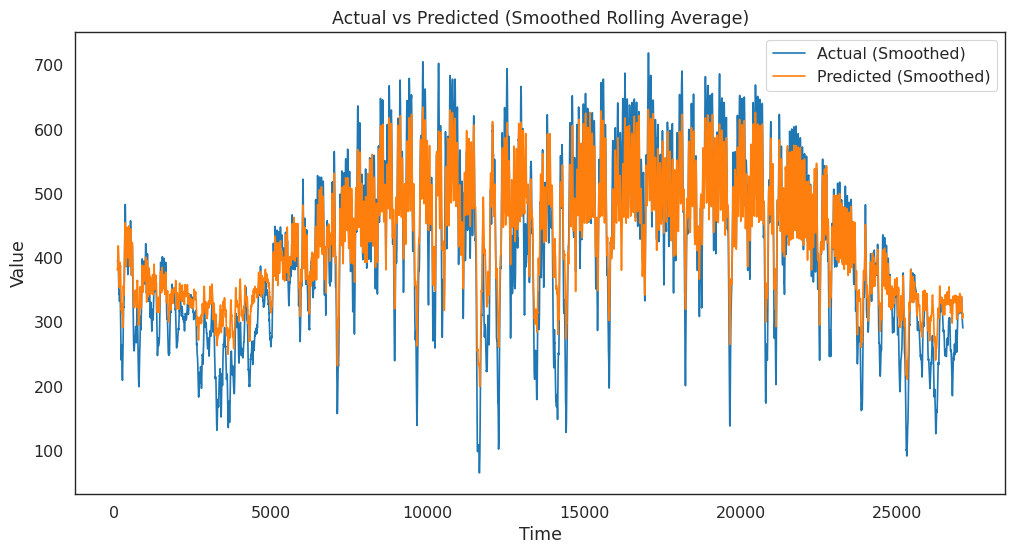

In [101]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [102]:
from sklearn.ensemble import ExtraTreesRegressor

benchmark_model = ExtraTreesRegressor(n_estimators = 125, max_depth = 100, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "ExtraTrees Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

ExtraTreesRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                    n_estimators=125)
Regressor fitted in 52.84 seconds
Score on Training data : 90.90%
Score on Testing data : 72.17%
Regressor fitted in 52.8398 seconds
Score on Training data : 90.9037%
Score on Testing data : 72.1742%
RMSE : 141.5545
nRMSE: 0.3432
MAE: 97.7407


In [103]:
from sklearn.neural_network import MLPRegressor

benchmark_model = MLPRegressor(batch_size = 256, solver = "adam", activation = "relu", max_iter = 300, learning_rate_init = 0.005)
print(benchmark_model)

start = time()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.2f} seconds".format(end - start))
print("Score on Training data : {:.2f}%".format(training_score))
print("Score on Testing data : {:.2f}%".format(testing_score))

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "MLP Regressor",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)

    }
    ).to_frame().T.set_index(["Name"])]
)

MLPRegressor(batch_size=256, learning_rate_init=0.005, max_iter=300)
Regressor fitted in 30.00 seconds
Score on Training data : 69.78%
Score on Testing data : 69.80%
Regressor fitted in 29.9952 seconds
Score on Training data : 69.7794%
Score on Testing data : 69.7995%
RMSE : 147.4713
nRMSE: 0.3575
MAE: 101.3194


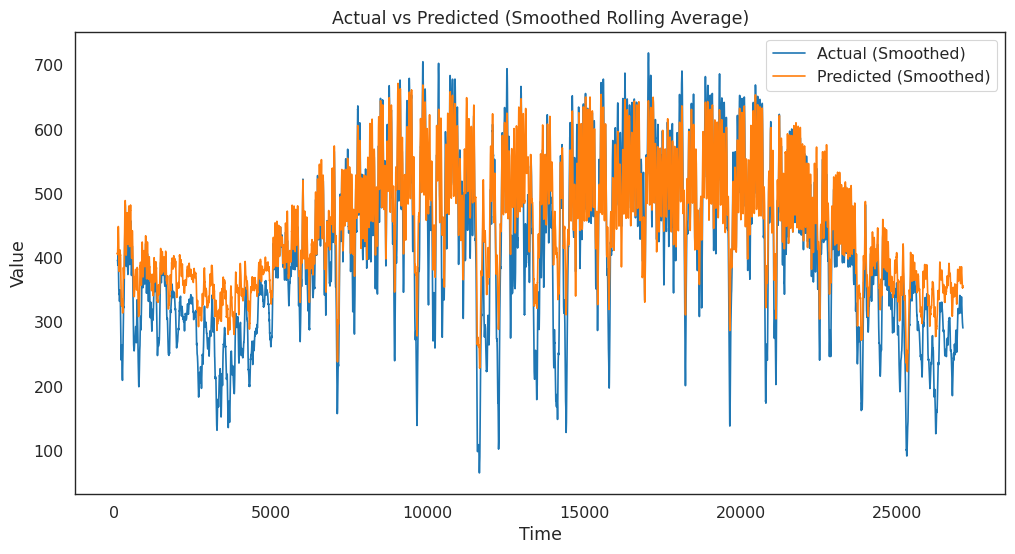

In [104]:
window = 100  # Adjust window size

# Convert the NumPy arrays to Pandas Series for rolling calculations
actual_series = pd.Series(actual.flatten())  # Flatten to 1D if necessary
outputs_series = pd.Series(outputs.flatten()) # Flatten to 1D if necessary

# Calculate rolling means using Pandas
actual_smooth = actual_series.rolling(window=window).mean()
outputs_smooth = outputs_series.rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(actual_smooth, label="Actual (Smoothed)", linestyle="-")
plt.plot(outputs_smooth, label="Predicted (Smoothed)", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Smoothed Rolling Average)")
plt.legend()
plt.show()

In [105]:
properties

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
Linear Regression (Benchmark),195.6791,0.4744,158.4345,47.134,46.8273,0.1249
Ridge Regression,195.6811,0.4744,158.4447,47.134,46.8263,0.0461
KNeighbours Regressor,159.5531,0.3868,107.6854,78.2039,64.6483,0.0134
RandomForest Regressor,142.6511,0.3458,97.884,90.6675,71.7415,290.9568
GradientBoosting Regressor,146.809,0.3559,104.3355,71.2077,70.0701,116.4912
ExtraTrees Regressor,141.5545,0.3432,97.7407,90.9037,72.1742,52.8398
MLP Regressor,147.4713,0.3575,101.3194,69.7794,69.7995,29.9952


In [106]:
properties.sort_values(by = "nRMSE")

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
ExtraTrees Regressor,141.5545,0.3432,97.7407,90.9037,72.1742,52.8398
RandomForest Regressor,142.6511,0.3458,97.884,90.6675,71.7415,290.9568
GradientBoosting Regressor,146.809,0.3559,104.3355,71.2077,70.0701,116.4912
MLP Regressor,147.4713,0.3575,101.3194,69.7794,69.7995,29.9952
KNeighbours Regressor,159.5531,0.3868,107.6854,78.2039,64.6483,0.0134
Linear Regression (Benchmark),195.6791,0.4744,158.4345,47.134,46.8273,0.1249
Ridge Regression,195.6811,0.4744,158.4447,47.134,46.8263,0.0461


# Performance Of Models

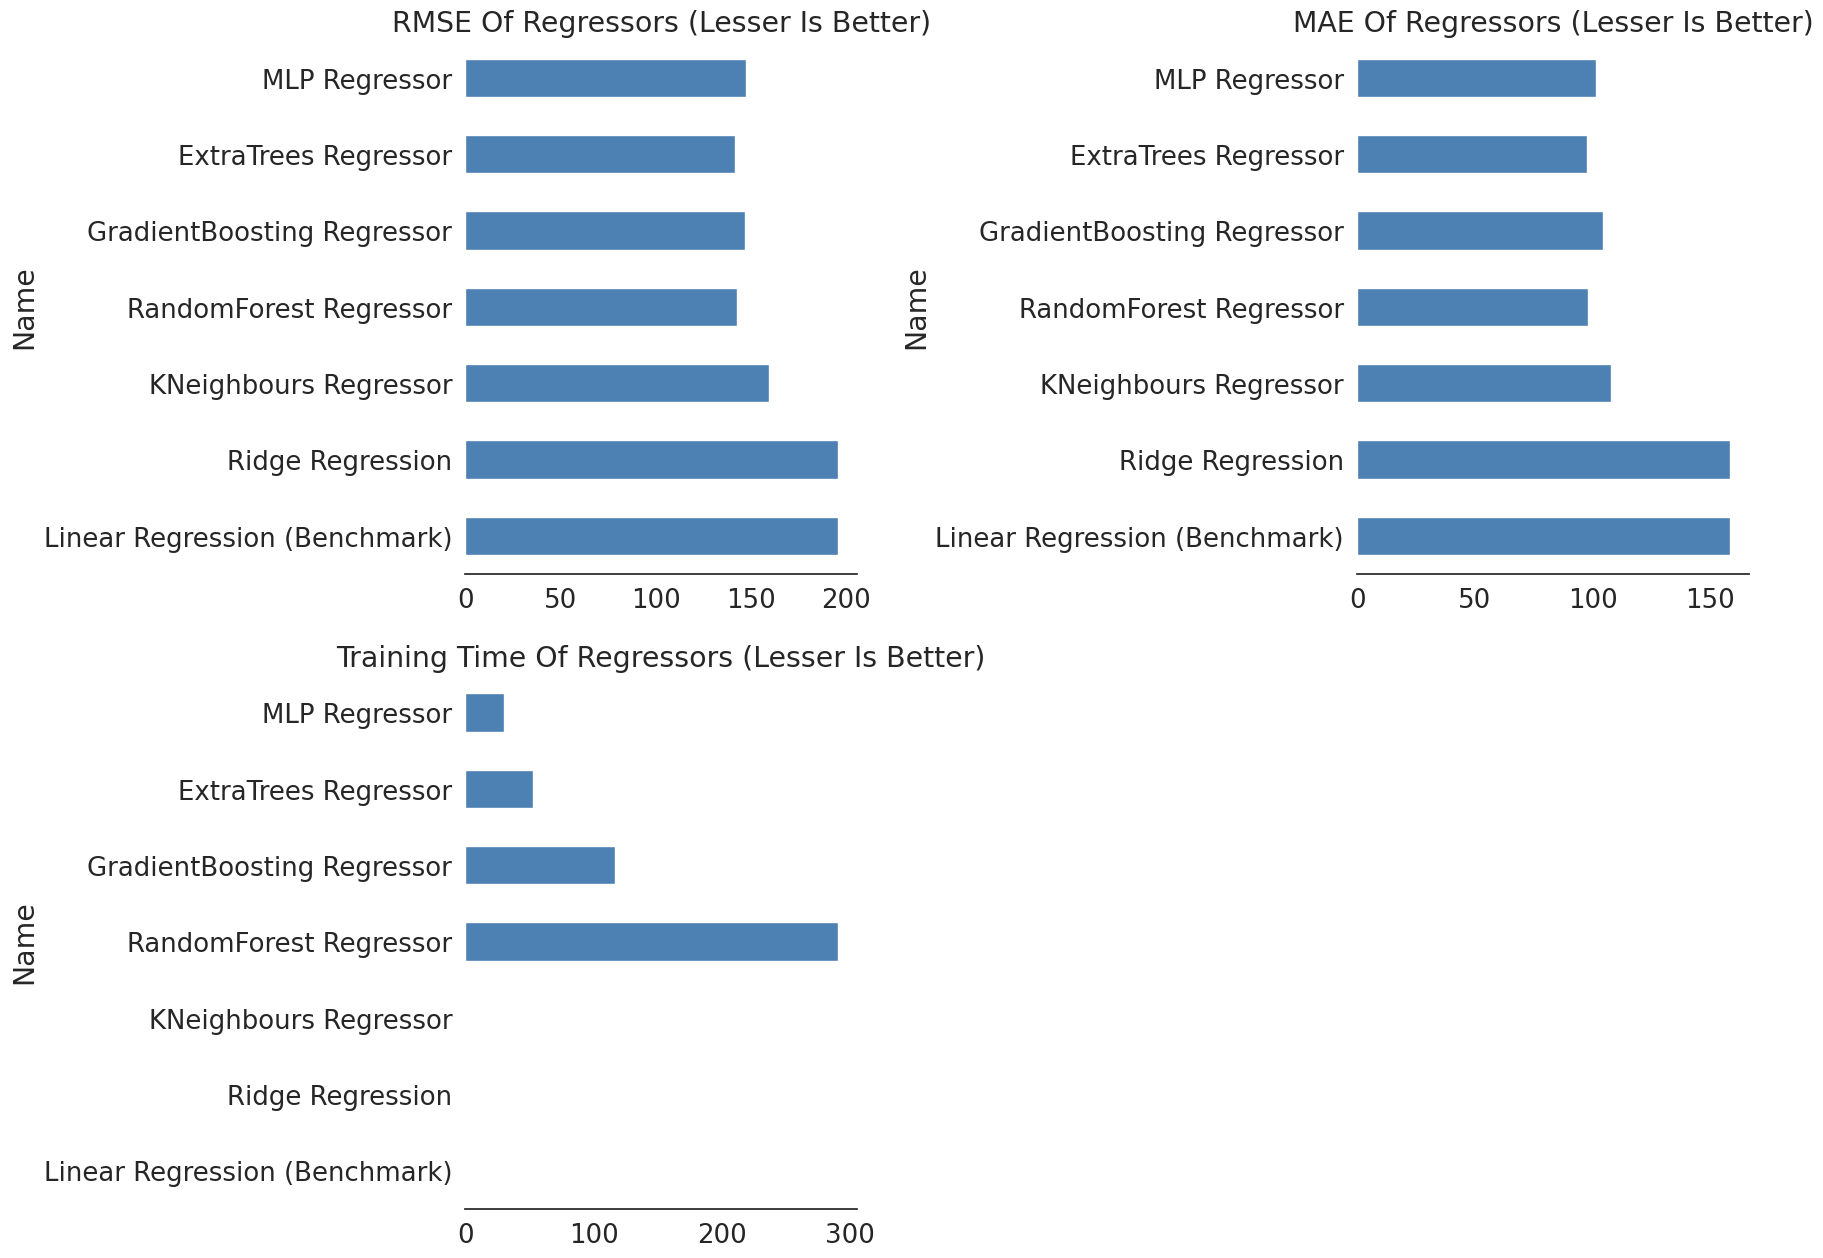

In [107]:
# Plot to compare thePerformance of Algorithms
sns.set_context("notebook", font_scale=1.7)
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.title("RMSE Of Regressors (Lesser Is Better)")
properties["RMSE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()


plt.subplot(2,2,2)
plt.title("MAE Of Regressors (Lesser Is Better)")
properties["MAE"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

plt.subplot(2,2,3)
plt.title("Training Time Of Regressors (Lesser Is Better)")
properties["Training Times"].plot(kind="barh", color='#4d80b3');
sns.despine(left=True)
plt.tight_layout()

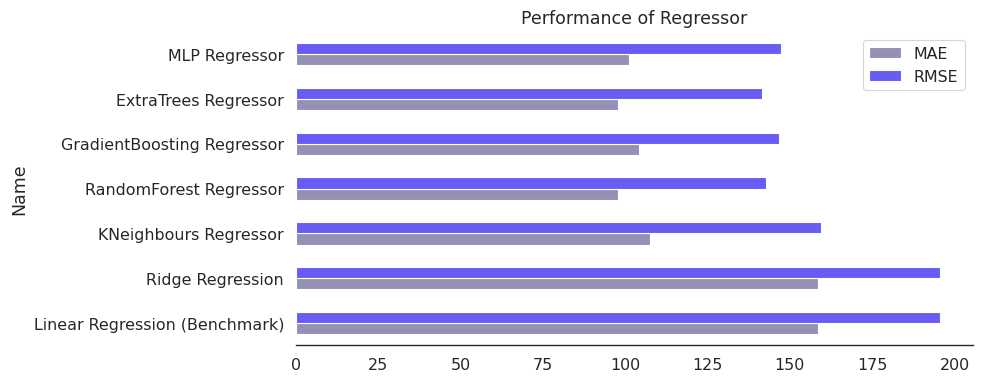

In [108]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)

ax= properties[["MAE", "RMSE"]].plot(kind="barh", color=['#9491B5', '#685CF4'], title="Performance of Regressor", figsize=(10, 4))
sns.despine(left=True);
plt.tight_layout()

plt.show()

#Optimizing Best Peforming Model

In [109]:
from copy import deepcopy as dc

data = dc(data_df)
data['local_datetime'] = pd.to_datetime(data_df['local_datetime'])
data.set_index('local_datetime', inplace = True)
data.drop('datetime', axis = 1, inplace = True)
data['Target'] = data['GHI'].shift(-12)
data.dropna(inplace = True)

In [110]:
Y = data['Target'].to_numpy()
X = data.drop(['Target'], axis = 1)
featuresTrain = X.columns
X = X.to_numpy()

In [111]:
def data_split_scale(X, Y):
  train = int(0.8 * len(X))  # 80% Train
  test = len(X) - train #20% test

  X_train, Y_train = X[:train], Y[:train]
  X_test, Y_test = X[train:], Y[train:]

  X_scaler = MinMaxScaler(feature_range=(-1,1))
  Y_scaler = MinMaxScaler(feature_range=(-1,1))

  X_train_scaled = X_scaler.fit_transform(X_train)
  X_test_scaled = X_scaler.transform(X_test)

  Y_train_scaled = Y_scaler.fit_transform(Y_train.reshape(-1,1))
  Y_test_scaled = Y_scaler.transform(Y_test.reshape(-1,1))

  print("Shapes:", X_train_scaled.shape, Y_train_scaled.shape, X_test_scaled.shape, Y_test_scaled.shape)

  return X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler

X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler = data_split_scale(X, Y)

Shapes: (108411, 56) (108411, 1) (27103, 56) (27103, 1)


In [112]:
from sklearn.ensemble import ExtraTreesRegressor

# Train model
etr = ExtraTreesRegressor()
Y_train_scaled = Y_train_scaled.ravel()
etr.fit(X_train_scaled, Y_train_scaled)

# Get feature importance
importances = etr.feature_importances_

# Sort and plot
feat_imp = pd.Series(importances, index=featuresTrain).sort_values(ascending=False)
top_features = feat_imp[feat_imp > 0.01].index
print(top_features)

Index(['Hour', 'GHI', 'GHI_T_1', 'Kcs', 'DNI', 'Clearsky GHI', 'GHI_T_23',
       'Solar Zenith Angle', 'GHI_T_2', 'Month', 'GHI_T_21', 'GHI_T_11',
       'Temperature', 'GHI_T_22', 'GHI_T_14', 'SSA', 'GHI_T_24', 'GHI_T_12',
       'Pressure', 'GHI_T_15'],
      dtype='object')


In [113]:
X = data[list(top_features)].to_numpy()
X_train_scaled, Y_train_scaled, X_test_scaled, Y_test_scaled, X_scaler, Y_scaler = data_split_scale(X, Y)

Shapes: (108411, 20) (108411, 1) (27103, 20) (27103, 1)


In [114]:
from sklearn.ensemble import ExtraTreesRegressor

benchmark_model = ExtraTreesRegressor(n_estimators = 125, max_depth = 100, min_samples_split = 4, min_samples_leaf = 4)
print(benchmark_model)

start = time()
Y_train_scaled = Y_train_scaled.ravel()
benchmark_model.fit(X_train_scaled, Y_train_scaled)
end = time()

# Make predictions
outputs = benchmark_model.predict(X_test_scaled)

# Inverse transform Y_pred and Y_test_df
# Inverse transform Y_test_df and Y_pred (ensure they are 2D)
actual = Y_scaler.inverse_transform(Y_test_scaled.reshape(-1, 1))
outputs = Y_scaler.inverse_transform(outputs.reshape(-1, 1))

training_score = benchmark_model.score(X_train_scaled, Y_train_scaled) * 100
testing_score = benchmark_model.score(X_test_scaled, Y_test_scaled) * 100

print("Regressor fitted in {:.4f} seconds".format(end - start))
print("Score on Training data : {:.4f}%".format(training_score))
print("Score on Testing data : {:.4f}%".format(testing_score))

# Compute error metrics in the original scale
rmse = np.sqrt(mean_squared_error(actual, outputs))
nrmse_mean = rmse / np.mean(actual)
print("RMSE : {:.4f}".format(rmse))
print(f"nRMSE: {nrmse_mean:.4f}")
mae = mean_absolute_error(actual, outputs)
print(f"MAE: {mae:.4f}")

properties = pd.concat(
    [properties, pd.Series(
      {
        "Name": "ExtraTrees Regressor (With Feature Selection)",
        "RMSE": round(rmse, 4),
        "nRMSE": round(nrmse_mean, 4),
        "MAE": round(mae, 4),
        "Training Scores": round(training_score, 4),
        "Testing Scores" : round(testing_score, 4),
        "Training Times": round(end - start, 4)
    }
    ).to_frame().T.set_index(["Name"])]
)

ExtraTreesRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=4,
                    n_estimators=125)
Regressor fitted in 55.8470 seconds
Score on Training data : 94.4465%
Score on Testing data : 78.4901%
RMSE : 124.4570
nRMSE: 0.3017
MAE: 83.0688


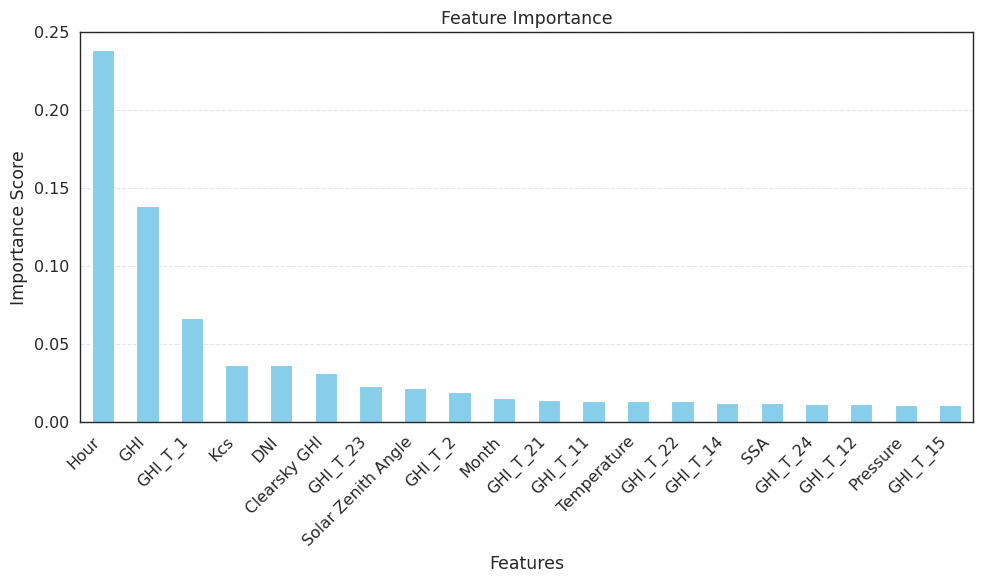

In [115]:
plt.figure(figsize=(10, 6))
feat_imp = feat_imp[feat_imp > 0.01]
feat_imp.plot(kind='bar', color='skyblue')

# Customizing the plot
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [116]:
properties.sort_values(by = "nRMSE")

,RMSE,nRMSE,MAE,Training Scores,Testing Scores,Training Times
Name,,,,,,
ExtraTrees Regressor (With Feature Selection),124.457,0.3017,83.0688,94.4465,78.4901,55.847
ExtraTrees Regressor,141.5545,0.3432,97.7407,90.9037,72.1742,52.8398
RandomForest Regressor,142.6511,0.3458,97.884,90.6675,71.7415,290.9568
GradientBoosting Regressor,146.809,0.3559,104.3355,71.2077,70.0701,116.4912
MLP Regressor,147.4713,0.3575,101.3194,69.7794,69.7995,29.9952
KNeighbours Regressor,159.5531,0.3868,107.6854,78.2039,64.6483,0.0134
Linear Regression (Benchmark),195.6791,0.4744,158.4345,47.134,46.8273,0.1249
Ridge Regression,195.6811,0.4744,158.4447,47.134,46.8263,0.0461


In [117]:
properties.to_csv("120_Minutes_Ahead.csv", index = False)